## Stanza notebook
using 3 labels: <b>['keterlibatan','kontradiksi',''netral]</b> <br>
train data from : <b>'dependency_full.csv'</b> <br>
test data from : <b>'dependency_dev_snli.csv'</b> <br>



### Import data

In [1]:
# Import TensorFlow into jupyter notebook
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSSSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :()")


TF version:  2.10.0
TF Hub version:  0.15.0
GPU available (YESSSSSS!!!!!!!)


In [2]:
import pandas as pd

# function to get data
def get_data(location,data):
    # get the data from csv location
    df_name = pd.read_csv(location) 
    # change the label names
    df_name[' label emas'] = df_name[' label emas'].replace([' keterlibatan',
                                                             ' netral',
                                                             ' kontradiksi'],
                                                            ['keterlibatan',
                                                             'netral',
                                                             'kontradiksi'])
    df_name = df_name[df_name[' label emas'] != ' -']
    df_name = df_name[df_name[' label emas'] != '-']
    df_name = df_name[:data].dropna()
    # Change the label
    return df_name

df_train = get_data('E:\\Suwija Putra\\BipletBiLSTM\\dependency-snli\\raw_data\\dependency_train_snli_indo.csv', -1)
df_val = get_data('E:\\Suwija Putra\\BipletBiLSTM\\dependency-snli\\raw_data\\dependency_dev_snli_indo.csv',-1)

### Visualize data
Visualize data to see the distribution of the data (Bar Chart)

df_train data:   label emas
keterlibatan    183383
kontradiksi     183149
netral          182746
Name: count, dtype: int64

df_val data:   label emas
keterlibatan    3328
kontradiksi     3278
netral          3234
Name: count, dtype: int64


<Axes: xlabel=' label emas', ylabel='count'>

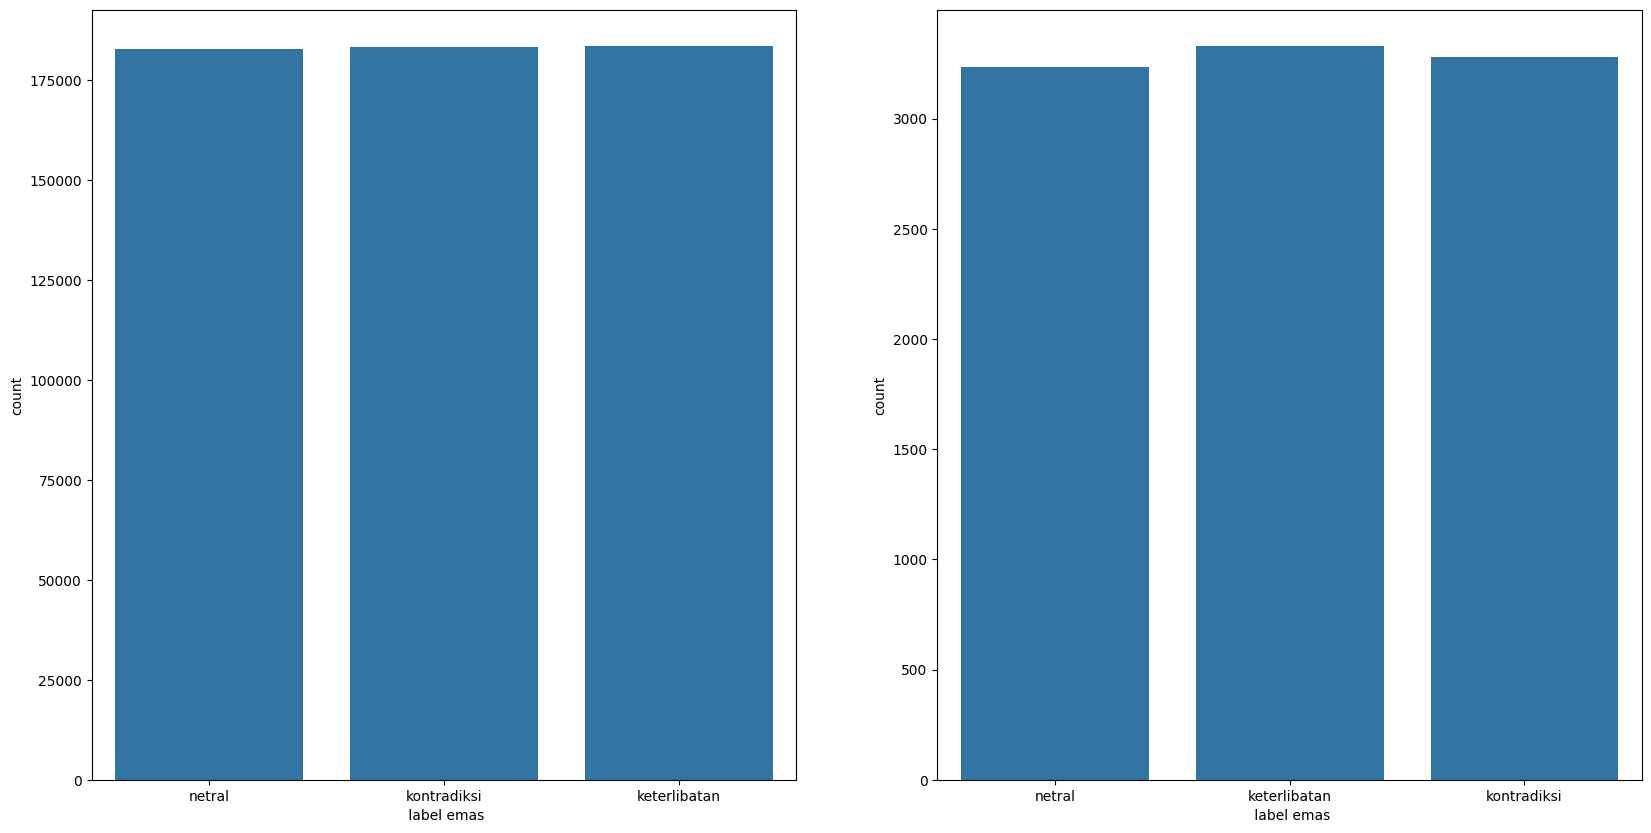

In [3]:
# Visualize ' label emas' 
import seaborn as sns
import matplotlib.pyplot as plt


print('df_train data: ',df_train.value_counts(' label emas'))
print('\ndf_val data: ',df_val.value_counts(' label emas'))

fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=' label emas', data=df_train, ax=ax[0])
sns.countplot(x=' label emas', data=df_val, ax=ax[1])

### Preprocessing

In [4]:
from os.path import join as pjoin, isfile
import numpy as np
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import pickle

In [5]:
def drop_data(df):
    X = df.drop([' label emas'], axis=1).astype('str')
    y = df[' label emas'].astype('str')
    return X,y

X_train, y_train = drop_data(df_train)
X_val, y_val = drop_data(df_val)

print('X_train data: ',X_train.shape)
print('y_train data: ',y_train.shape)
print('\nX_val data: ',X_val.shape)
print('y_val data: ',y_val.shape)

X_train.head()

X_train data:  (549278, 4)
y_train data:  (549278,)

X_val data:  (9840, 4)
y_val data:  (9840,)


head1  \
0  melompati atas seseorang atas melompati rusak ...   
1  melompati atas seseorang atas melompati rusak ...   
2  melompati atas seseorang atas melompati rusak ...   
3       tersenyum melambai tersenyum kamera melambai   
4       tersenyum melambai tersenyum kamera melambai   

                                  dependecy1  \
0  seseorang di atas kuda pesawat yang rusak   
1  seseorang di atas kuda pesawat yang rusak   
2  seseorang di atas kuda pesawat yang rusak   
3            anakanak dan melambai ke kamera   
4            anakanak dan melambai ke kamera   

                                               head2  \
0  melatih melatih melatih kuda kompetisi kompeti...   
1              makan makan makan makan memesan telur   
2    berada ruangan ruangan berada atas ruangan atas   
3              tersenyum orang tersenyum orang orang   
4                                 ada hadir anakanak   

                                         dependecy2  
0  seseorang sedang kuda nya untuk sebuah kompetisi  
1        seseorang sedang malam memesan telur dadar  
2            seseorang di luar ruangan di atas kuda  
3                      mereka pada orang tua mereka  
4                               anakanak yang hadir

In [6]:
# OOV = Out of Vocabulary
oov_token = "<OOV>"
SentenceLen = 50
X = X_train

if not isfile('tokenizer_multihead_full.pickle'):
    tokenizer = Tokenizer(oov_token=oov_token)
    # tokenizer.fit_on_texts(train[0] + train[1] + dev[0] + dev[1] + test[0] + test[1])
    tokenizer.fit_on_texts(X['head1'] + X['dependecy1'] + X['head2'] + X['dependecy2'])
    # tokenizer.fit_on_texts(X['head1'] + X['dependecy1'] + X['head2'] + X['dependecy2'])
    with open('tokenizer_multihead_full.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

tokenizer = pickle.load(open('tokenizer_multihead_full.pickle', 'rb'))
print(tokenizer.word_index)
print('Found %s unique tokens.' % len(tokenizer.word_index))

def PadSequence(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=SentenceLen, padding='post', truncating='post')
    

def padding_loop(text):
    sequences = tokenizer.texts_to_sequences(text)
    loop_list = []
    for i in range(len(sequences)):
        # print(sequences[i])
        looped_arr1 = sequences[i]
        looped_arr = [looped_arr1[i % len(looped_arr1)] for i in range(SentenceLen)]
        loop_list.append(looped_arr)

    return pad_sequences(loop_list, maxlen=SentenceLen, padding='post', truncating='post')



{'<OOV>': 1, 'di': 2, 'pria': 3, 'wanita': 4, 'anak': 5, 'sedang': 6, 'dengan': 7, 'mengenakan': 8, 'dan': 9, 'orang': 10, 'duduk': 11, 'yang': 12, 'bermain': 13, 'berdiri': 14, 'gadis': 15, 'anjing': 16, 'atas': 17, 'berjalan': 18, 'kemeja': 19, 'nya': 20, 'depan': 21, 'luar': 22, 'jalan': 23, 'itu': 24, 'berbaju': 25, 'melihat': 26, 'memegang': 27, 'lakilaki': 28, 'celana': 29, 'seorang': 30, 'hitam': 31, 'dalam': 32, 'sepeda': 33, 'putih': 34, 'untuk': 35, 'pemain': 36, 'ke': 37, 'merah': 38, 'bola': 39, 'berada': 40, 'muda': 41, 'mengendarai': 42, 'air': 43, 'biru': 44, 'topi': 45, 'melakukan': 46, 'pakaian': 47, 'tangan': 48, 'sebuah': 49, 'berlari': 50, 'belakang': 51, 'kecil': 52, 'berbicara': 53, 'melompat': 54, 'memainkan': 55, 'dari': 56, 'ada': 57, 'bawah': 58, 'meja': 59, 'tua': 60, 'makan': 61, 'samping': 62, 'rambut': 63, 'satu': 64, 'ruangan': 65, 'menonton': 66, 'latar': 67, 'berpakaian': 68, 'pantai': 69, 'tempat': 70, 'lapangan': 71, 'dekat': 72, 'bekerja': 73, 'taman

In [7]:
# one hot encoding
def labelToVec(labels):
    vec = []
    for label in labels:
        if label == 'keterlibatan':
            vec.append([1.0, 0.0, 0.0])
        elif label == 'kontradiksi':
            vec.append([0.0, 1.0, 0.0])
        elif label == 'netral':
            vec.append([0.0, 0.0, 1.0])
        else:
            # raise ValueError('Unknown label-%s' % (label))
            vec.append([0.0, 0.0, 0.0])
    return np.array(vec)



train_x = [padding_loop(X_train['head1']), padding_loop(X_train['dependecy1']), padding_loop(X_train['head2']), padding_loop(X_train['dependecy2'])]
train_y = labelToVec(y_train)
print(train_x[0].shape)
print(train_y.shape)

val_x = [padding_loop(X_val['head1']), padding_loop(X_val['dependecy1']), padding_loop(X_val['head2']), padding_loop(X_val['dependecy2'])]
val_y = labelToVec(y_val)
print(val_x[0].shape)
print(val_y.shape)

(549278, 50)
(549278, 3)
(9840, 50)
(9840, 3)


In [8]:
y_val

0             netral
1       keterlibatan
2        kontradiksi
3       keterlibatan
4             netral
            ...     
9993    keterlibatan
9994    keterlibatan
9996     kontradiksi
9997    keterlibatan
9998     kontradiksi
Name:  label emas, Length: 9840, dtype: object

In [9]:
val_y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [10]:
y_train

0               netral
1          kontradiksi
2         keterlibatan
3               netral
4         keterlibatan
              ...     
550146    keterlibatan
550147     kontradiksi
550148          netral
550149          netral
550150     kontradiksi
Name:  label emas, Length: 549278, dtype: object

In [11]:
train_y

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

### Create Model

In [12]:
from tensorflow.keras.layers import Layer
from keras import backend as K
from keras.models import Model
from keras.layers import LSTM, Multiply, Subtract, Attention, Concatenate
from keras.layers import AveragePooling1D, MaxPooling1D, Input, Dropout, Dense, concatenate, Embedding, Flatten, LSTM, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, Reshape

In [13]:
if not isfile('embeddings_multihead_full.npy'):

    embeddings_index = {}
    f = open('D:\\Suwija Putra\\datasetTextualEntailment\\glove_50dim_wiki.id.case.txt', encoding='utf8')
    for line in f:
        values = line.split()
        word = ' '.join(values[:-50])
        coefs = np.asarray(values[-50:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    
    word_index = tokenizer.word_index

    embedding_matrix = np.zeros((len(word_index) + 1, SentenceLen))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    
    np.save('embeddings_multihead_full.npy', embedding_matrix)

def load_embeddings():
    embedding_matrix = np.load('embeddings_multihead_full.npy')
    embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                                SentenceLen,
                                weights=[embedding_matrix],
                                input_length=SentenceLen,
                                
                                trainable=False)
    return embedding_layer

embedding_layer = load_embeddings()


In [14]:
def comp_layer(x1,x2):
    substraction = Subtract()([x1,x2])
    multiplication = Multiply()([x1,x2])
    return concatenate([x1,x2,substraction,multiplication])

In [15]:
from keras.layers import LSTM, Input, Dot, Add, Permute, Reshape, Softmax, Multiply, Concatenate, Subtract, Dense, Lambda, Embedding, Dropout
def soft_alignment_attention(input_1, input_2):
    attention = Lambda(lambda x: K.batch_dot(x[0], x[1], axes=[2, 2]))([input_1, input_2])
    w_att_1 = Lambda(lambda x: K.softmax(x))(attention)
    w_att_2 = Permute((2, 1))(Lambda(lambda x: K.softmax(x))(attention))
    in1_aligned = Lambda(lambda x: K.batch_dot(x[0], x[1]))([w_att_1, input_2])
    in2_aligned = Lambda(lambda x: K.batch_dot(x[0], x[1]))([w_att_2, input_1])
    return in1_aligned, in2_aligned

def subtract_multiply(input_1, input_2):
    mult = Multiply()([input_1, input_2])
    sub = Subtract()([input_1, input_2])
    return Concatenate()([sub, mult])

def apply_multiple(input_layer):
    avg = Lambda(lambda x: K.mean(x, axis=1))(input_layer)
    max = Lambda(lambda x: K.max(x, axis=1))(input_layer)
    return Concatenate()([avg, max])

In [16]:
import tensorflow as tf
from keras_multi_head import MultiHeadAttention

def get_model():
    input = Input(shape=(SentenceLen,), dtype='float32') #head1
    input2 = Input(shape=(SentenceLen,), dtype='float32') #dep1
    input3 = Input(shape=(SentenceLen,), dtype='float32') #head2
    input4 = Input(shape=(SentenceLen,), dtype='float32') #dep2

    ax1 = embedding_layer(input) # Head1
    ax2 = embedding_layer(input2) # Dep1
    ax3 = embedding_layer(input3) # Head2
    ax4 = embedding_layer(input4) # Dep2

    #Individual Comparasion Biplet
    comp_layer1_p = comp_layer(ax1,ax3) # Head1 x head2
    comp_layer2_p = comp_layer(ax1,ax4) # Head1 x dep2
    comp_layer3_p = comp_layer(ax2,ax4) # Dep1 x dep2
    comp_layer4_p = comp_layer(ax2,ax3) # Dep1 x head2

    comp_layer1_h = comp_layer(ax3,ax1) # Head2 x head1
    comp_layer2_h = comp_layer(ax4,ax1) # Dep2 x head1
    comp_layer3_h = comp_layer(ax4,ax2) # Dep2 x dep1
    comp_layer4_h = comp_layer(ax3,ax2) # Head2 x dep1

    axp = Concatenate()([comp_layer1_p,comp_layer2_p,comp_layer3_p,comp_layer4_p])
    axh = Concatenate()([comp_layer1_h,comp_layer2_h,comp_layer3_h,comp_layer4_h])  

    # Encoding layers
    lstm_layer = Bidirectional(LSTM(100, return_sequences=True))
    encoded_1 = lstm_layer(axp)
    encoded_2 = lstm_layer(axh)

     # Attention
    in1_aligned, in2_aligned = soft_alignment_attention(encoded_1, encoded_2)

    # Compare and aggregate
    merged_1 = Concatenate()([encoded_1, in1_aligned, subtract_multiply(encoded_1, in1_aligned)])
    merged_2 = Concatenate()([encoded_2, in2_aligned, subtract_multiply(encoded_2, in2_aligned)])
    merged_1 = Bidirectional(LSTM(100, return_sequences=True))(merged_1)
    merged_2 = Bidirectional(LSTM(100, return_sequences=True))(merged_2)

    rnn_p = merged_1
    rnn_h = merged_2
    
    # Replace SeqSelfAttention with MultiHeadAttention
    num_heads = 4  # You can adjust the number of attention heads as needed
    att_p = MultiHeadAttention(head_num=num_heads, name='Multi-Head1')([rnn_p, rnn_p, rnn_p])
    att_h = MultiHeadAttention(head_num=num_heads, name='Multi-Head2')([rnn_h, rnn_h, rnn_h])

    #Pooling
    p = apply_multiple(att_p)
    h = apply_multiple(att_h)
    
    y = Concatenate()([p, h])
    y = Dense(512, activation='tanh')(y)
    y = Dropout(0.5)(y)
    y = Dense(64, activation='tanh')(y)
    y = Dropout(0.5)(y)
    y = Dense(32, activation='tanh')(y)
    y = Dropout(0.5)(y)
    y = Dense(3, activation='softmax')(y)
    
    model = Model(inputs=[input, input2, input3, input4], outputs=y)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = get_model()
model.summary()


c:\Users\Suwija\anaconda3\envs\suwija_gpu_env\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 50)]         0           []                               
                                                                                              

In [17]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10, verbose=1, mode='auto')

In [18]:
history = model.fit([train_x[:][0],train_x[:][1],
                     train_x[:][2],train_x[:][3]], 
                    train_y, epochs=20, batch_size=32, 
                    validation_data=([val_x[:][0],val_x[:][1],val_x[:][2],val_x[:][3]], val_y))

Epoch 1/20
17165/17165 [==============================] - 523s 30ms/step - loss: 0.8088 - accuracy: 0.6480 - val_loss: 0.6741 - val_accuracy: 0.7239
Epoch 2/20
17165/17165 [==============================] - 515s 30ms/step - loss: 0.6770 - accuracy: 0.7252 - val_loss: 0.6132 - val_accuracy: 0.7510
Epoch 3/20
17165/17165 [==============================] - 515s 30ms/step - loss: 0.6291 - accuracy: 0.7488 - val_loss: 0.5857 - val_accuracy: 0.7634
Epoch 4/20
17165/17165 [==============================] - 516s 30ms/step - loss: 0.6013 - accuracy: 0.7632 - val_loss: 0.5759 - val_accuracy: 0.7699
Epoch 5/20
17165/17165 [==============================] - 512s 30ms/step - loss: 0.5818 - accuracy: 0.7729 - val_loss: 0.5750 - val_accuracy: 0.7703
Epoch 6/20
17165/17165 [==============================] - 513s 30ms/step - loss: 0.5655 - accuracy: 0.7812 - val_loss: 0.5637 - val_accuracy: 0.7783
Epoch 7/20
17165/17165 [==============================] - 514s 30ms/step - loss: 0.5510 - accuracy: 0.7881

In [19]:
# save model
model.save('model_full_50epoch_esim_comp_tanh_fix.h5')
model.save_weights('model_weights_50epoch_esim_comp_tanh_fix.hdf5')

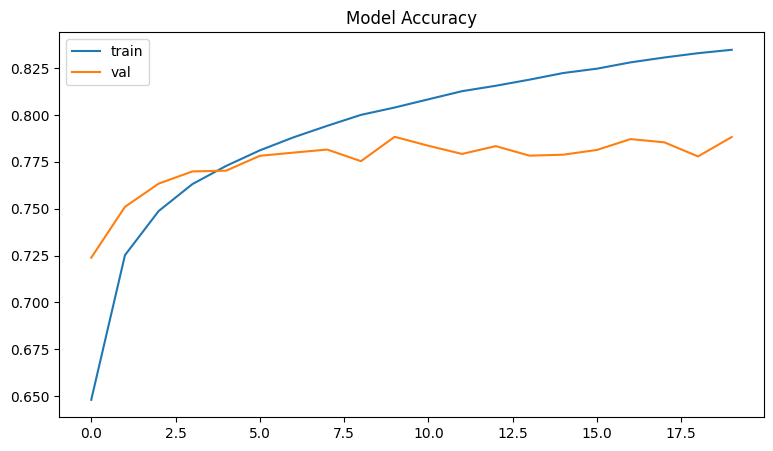

In [20]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Model Accuracy')
# make legend and show plot
ax.legend(['train','val'],loc='upper left')

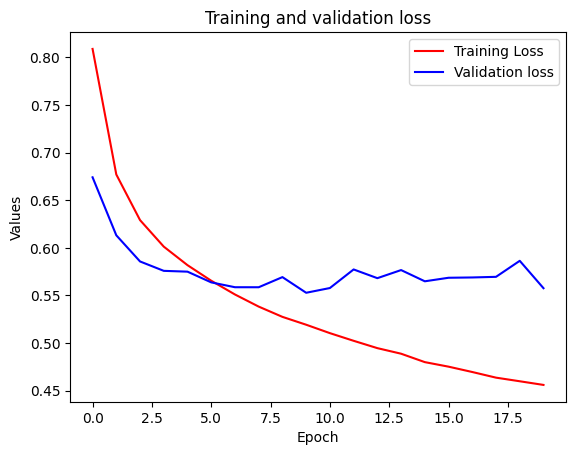

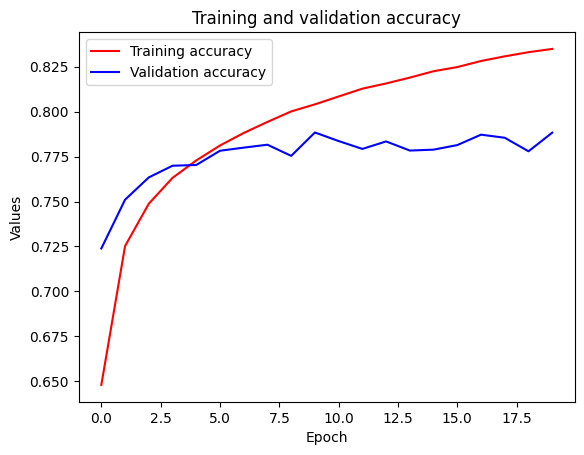

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend(loc=0)
plt.figure()

plt.show()

#### Prediction Self

In [23]:
df_test = get_data('E:\\Suwija Putra\\BipletBiLSTM\\dependency-snli\\raw_data\\dependency_tes_snli_indo.csv',10000)
X_test, y_test = drop_data(df_test)
test_x = [padding_loop(X_test['head1']), padding_loop(X_test['dependecy1']), padding_loop(X_test['head2']), padding_loop(X_test['dependecy2'])]
test_y = labelToVec(y_test)

In [24]:
# Load Model model_netral
from keras.models import load_model
#from keras_multi_head import MultiHeadAttention
# model_multi = load_model('model_full_20epoch_32Bbilstm_multiclass.h5',custom_objects={'MultiHeadAttention':MultiHeadAttention})
model_multi = load_model('model_full_50epoch_esim_comp_tanh_fix.h5', custom_objects={'MultiHeadAttention':MultiHeadAttention})
model_multi.load_weights('model_weights_50epoch_esim_comp_tanh_fix.hdf5')

c:\Users\Suwija\anaconda3\envs\suwija_gpu_env\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model_multi.predict(test_x)
y_test_class = np.argmax(test_y, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))

307/307 [==============================] - 6s 14ms/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3367
           1       0.82      0.79      0.80      3236
           2       0.73      0.75      0.74      3219

    accuracy                           0.79      9822
   macro avg       0.79      0.79      0.79      9822
weighted avg       0.79      0.79      0.79      9822



[[2780  147  440]
 [ 253 2541  442]
 [ 401  397 2421]]


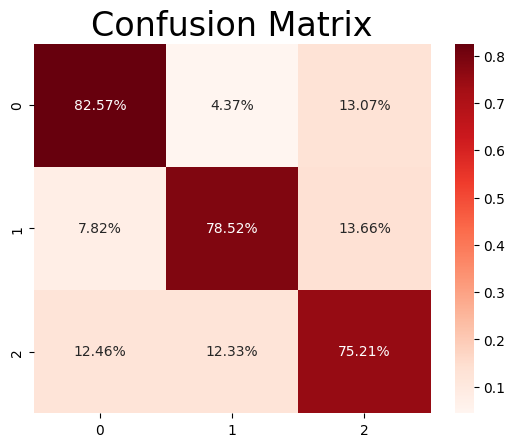

In [26]:
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# confusion Maxtrix
# 0 = entailment
# 1 = contradiction
# 2 = neutral
sns.heatmap((cm/np.sum(cm,axis=1)[:,None]), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Confusion Matrix",fontsize=24)
plt.show()

In [56]:
# Mapping dictionary
label_mapping = {0: "entailment", 1: "contradiction", 2: "neutral"}

# Convert numeric values to string labels
y_pred_labels = np.vectorize(label_mapping.get)(y_pred_class)

y_pred_labels

array(['neutral', 'neutral', 'contradiction', ..., 'contradiction',
       'entailment', 'neutral'], dtype='<U13')

In [57]:
# Function to map numeric labels to string labels
def label_mapping(label):
    return {0: "entailment", 1: "contradiction", 2: "neutral"}.get(label, "unknown")

In [58]:
# Convert numeric labels to string labels
y_test_labels = [label_mapping(label) for label in y_test_class]
y_pred_labels = [label_mapping(label) for label in y_pred_class]

# Add predictions and actual labels to the DataFrame
df_test['Actual Label'] = y_test_labels
df_test['Predicted Label'] = y_pred_labels

# Load the original sentences
test_file = 'E:\\Suwija Putra\\datasetTextualEntailment\\SNLI Indo Bersih\\SNLI_Indo_test.jsonl'
df_sentences = pd.read_json(test_file, lines=True)

# Merge the original sentences with the predictions and other columns
df_combined = pd.concat([df_sentences[['kalimat1', 'kalimat2']], 
                         df_test[['head1', 'dependecy1', 'head2', 'dependecy2', 'Actual Label', 'Predicted Label']]], 
                        axis=1)

# Save the merged DataFrame to an Excel file
output_path = 'E:\\Suwija Putra\\BipletBiLSTM\\dependency-snli\\raw_data\\predictions_new.xlsx'
df_combined.to_excel(output_path, index=False)